# Advanced Data Cleaning II


# From our first analysis we concluded that the data was insufficient to identify what the client was looking for so we contacted the client for more information. After communicating our findings, the client gave a list of codenames for the dataset and became more specific about the targeting platforms. They are interested in launching a new game title to three specific platforms: PC, Playstation and Xbox.
We will continue our analysis from the cleaned csv file from previous time.
Copy / paste the dictionaries with the codenames to your jupyter notebook!


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from matplotlib import pyplot as plt
#import time
#from datetime import datetime
pd.set_option('display.max_columns', None)

In [151]:
df_original = pd.read_csv(r'igbd_dataset_v1.csv', low_memory=False)
df_original.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,0.0,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"3,6,9,12,14",2011-04-19,0.0,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,0.0,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,9,2013-06-14,0.0,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625


In [152]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122402 entries, 0 to 122401
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         122401 non-null  float64
 1   name                       122400 non-null  object 
 2   platforms                  66051 non-null   object 
 3   first_release_date         64068 non-null   object 
 4   category                   122401 non-null  float64
 5   genres                     81459 non-null   object 
 6   themes                     53573 non-null   object 
 7   player_perspectives        33675 non-null   object 
 8   rating                     18645 non-null   float64
 9   rating_count               18648 non-null   float64
 10  similar_games              87876 non-null   object 
 11  total_rating               18648 non-null   float64
 12  total_rating_count         18648 non-null   float64
 13  url                        12

In [153]:
df_original.describe()

,id,category,rating,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
count,122401.000000,122401.000000,18645.000000,18648.000000,18648.000000,18648.000000,12417.000000,12417.000000,64068.000000,64068.000000,18645.000000,18645.000000
mean,71442.522512,0.087622,68.727962,23.332207,68.797717,25.549067,68.669364,3.777080,2007.398998,7.522320,1865.913579,0.736722
std,41101.619786,0.553061,14.897546,96.058306,14.303439,97.694489,16.275314,4.214995,11.352676,3.773595,8326.753374,3.287666
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1970.000000,1.000000,0.000000,0.000000
25%,37901.000000,0.000000,60.000000,1.000000,60.000000,1.000000,60.000000,1.000000,1999.000000,4.000000,80.000000,0.031587
50%,71091.000000,0.000000,70.000000,3.000000,70.145445,5.000000,70.875000,2.000000,2011.000000,8.000000,217.500000,0.085876
75%,107246.000000,0.000000,80.000000,11.000000,79.988435,14.000000,80.000000,5.000000,2017.000000,11.000000,764.819160,0.301975
max,141114.000000,7.000000,100.000000,2783.000000,100.000000,2817.000000,100.000000,60.000000,2024.000000,12.000000,253272.490450,100.000000


In [154]:
genres = {2:"Point-and-click",4:"Fighting",5:"Shooter",7:"Music",8:"Platform",9:"Puzzle", 10:"Racing",
    11:"Real Time Strategy (RTS)",12:"Role-playing (RPG)",13:"Simulator",14:"Sport",15:"Strategy",16:"Turn-based strategy (TBS)",
    24:"Tactical",26:"Quiz/Trivia", 25:"Hack and slash/Beat 'em up",30:"Pinball",31:"Adventure",
    33:"Arcade",34:"Visual Novel",32:"Indie",35:"Card & Board Game",36:"MOBA"}
themes = {17:"Fantasy",20:"Thriller",18:"Science fiction",1 :"Action",19:"Horror",21:"Survival",
    22:"Historical", 23:"Stealth", 28:"Business",27:"Comedy",31:"Drama",32:"Non-fiction",34:"Educational",
    33:"Sandbox",35:"Kids",38:"Open world",39:"Warfare",41:"4X (explore, expand, exploit, and exterminate)",
    42:"Erotic",43:"Mystery",40:"Party",44:"Romance"  }
perspectives = { 1:"First person", 2:"Third person",3:"Bird view",4:"Side view",
    5:"Text",6:"Auditory",7:"Virtual Reality"}
platforms = {0 : 'missing',  1 : 'missing',2 : 'missing',3 : 'Linux',4 : 'Nintendo 64',
5 : 'Wii',6 : 'PC',7 : 'PlayStation',8 : 'PlayStation 2',9 : 'PlayStation 3',11 : 'Xbox',
12 : 'Xbox 360',13 : 'PC DOS',14 : 'Mac',15 : 'Commodore C64/128',16 : 'Amiga',18 : 'Nintendo Entertainment System (NES)',
19 : 'Super Nintendo Entertainment System (SNES)',
20 : 'Nintendo DS',21 : 'Nintendo GameCube',22 : 'Game Boy Color',23 : 'Dreamcast',24 : 'Game Boy Advance',
25 : 'Amstrad CPC',26 : 'ZX Spectrum',27 : 'MSX',29 : 'Sega Mega Drive/Genesis',30 : 'Sega 32X',
32 : 'Sega Saturn',33 : 'Game Boy',34 : 'Android',35 : 'Sega Game Gear',36 : 'Xbox Live Arcade',
37 : 'Nintendo 3DS',38 : 'PlayStation Portable',39 : 'iOS',41 : 'Wii U',42 : 'N-Gage',44 : 'Tapwave Zodiac',
45 : 'PlayStation Network',46 : 'PlayStation Vita',47 : 'Virtual Console (Nintendo)',48 : 'PlayStation 4',
49 : 'Xbox One',50 : '3DO Interactive Multiplayer',51 : 'Family Computer Disk System',52 : 'Arcade',
53 : 'MSX2',55 : 'Mobile',56 : 'WiiWare',57 : 'WonderSwan',58 : 'Super Famicom',
59 : 'Atari 2600',60 : 'Atari 7800',61 : 'Atari Lynx',62 : 'Atari Jaguar',63 : 'Atari ST/STE',
64 : 'Sega Master System',65 : 'Atari 8-bit',66 : 'Atari 5200',67 : 'Intellivision',68 : 'ColecoVision',
69 : 'BBC Microcomputer System',70 : 'Vectrex',71 : 'Commodore VIC-20',72 : 'Ouya',73 : 'BlackBerry OS',
74 : 'Windows Phone',75 : 'Apple II',77 : 'Sharp X1',78 : 'Sega CD',79 : 'Neo Geo MVS',80 : 'Neo Geo AES',
82 : 'Web browser',84 : 'SG-1000',85 : 'Donner Model 30',86 : 'TurboGrafx-16/PC Engine',87 : 'Virtual Boy',
88 : 'Odyssey',89 : 'Microvision',90 : 'Commodore PET',91 : 'Bally Astrocade',92 : 'SteamOS',
93 : 'Commodore 16',94 : 'Commodore Plus/4',95 : 'PDP-1',96 : 'PDP-10',97 : 'PDP-8',98 : 'DEC GT40',
99 : 'Family Computer (FAMICOM)',100 : 'Analogue electronics',101 : 'Ferranti Nimrod Computer',102 : 'EDSAC',
103 : 'PDP-7',104 : 'HP 2100',105 : 'HP 3000',106 : 'SDS Sigma 7',107 : 'Call-A-Computer time-shared mainframe computer system',108 : 'PDP-11',
109 : 'CDC Cyber 70',110 : 'PLATO',111 : 'Imlac PDS-1',112 : 'Microcomputer',113 : 'OnLive Game System',
114 : 'Amiga CD32',115 : 'Apple IIGS',116 : 'Acorn Archimedes',117 : 'Philips CD-i',118 : 'FM Towns',
119 : 'Neo Geo Pocket',120 : 'Neo Geo Pocket Color',121 : 'Sharp X68000',122 : 'Nuon',123 : 'WonderSwan Color',
124 : 'SwanCrystal',125 : 'PC-8801',126 : 'TRS-80',127 : 'Fairchild Channel F',128 : 'PC Engine SuperGrafx',
129 : 'Texas Instruments TI-99',130 : 'Nintendo Switch',131 : 'Nintendo PlayStation',132 : 'Amazon Fire TV',
133 : 'Philips Videopac G7000',134 : 'Acorn Electron',135 : 'Hyper Neo Geo 64',136 : 'Neo Geo CD',
137 : 'New Nintendo 3DS',138 : 'VC 4000',139 : '1292 Advanced Programmable Video System',140 : 'AY-3-8500',
141 : 'AY-3-8610',142 : 'PC-50X Family',143 : 'AY-3-8760',144 : 'AY-3-8710',145 : 'AY-3-8603',
146 : 'AY-3-8605',147 : 'AY-3-8606',148 : 'AY-3-8607',149 : 'PC-98',150 : 'Turbografx-16/PC Engine CD',151 : 'TRS-80 Color Computer',
152 : 'FM-7',153 : 'Dragon 32/64',154 : 'Amstrad PCW',155 : 'Tatung Einstein',156 : 'Thomson MO5',
157 : 'NEC PC-6000 Series',158 : 'Commodore CDTV',159 : 'Nintendo DSi',160 : 'Nintendo eShop',161 : 'Windows Mixed Reality',
162 : 'Oculus VR',163 : 'SteamVR',164 : 'Daydream',165 : 'PlayStation VR',166 : 'PokĂŠmon mini',}
categories = {
    0:'Main Game',1:'DLC Addon', 2:'Expansion', 3:'Bundle', 4:'Standalone Expansion',
    5:'Mod',6:'Episode', 7:'Season'}

In [155]:
df = df_original.copy()
#df.info()
#df.dropna(subset=['platforms'],inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122402 entries, 0 to 122401
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         122401 non-null  float64
 1   name                       122400 non-null  object 
 2   platforms                  66051 non-null   object 
 3   first_release_date         64068 non-null   object 
 4   category                   122401 non-null  float64
 5   genres                     81459 non-null   object 
 6   themes                     53573 non-null   object 
 7   player_perspectives        33675 non-null   object 
 8   rating                     18645 non-null   float64
 9   rating_count               18648 non-null   float64
 10  similar_games              87876 non-null   object 
 11  total_rating               18648 non-null   float64
 12  total_rating_count         18648 non-null   float64
 13  url                        12

In [156]:
df.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
1,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,0.0,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
2,72.0,Portal2,"3,6,9,12,14",2011-04-19,0.0,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
3,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,0.0,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
4,1009.0,TheLastofUs,9,2013-06-14,0.0,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625


In [157]:
my_list=['platforms','player_perspectives','genres','themes']
for i in my_list[:1]:
    df[i]= df[i].astype(str)
    df[i] = df[i].str.split(",")
    df = df.explode(i)
    df[i] = pd.to_numeric(df[i], errors='coerce',downcast = 'integer')

In [158]:
df.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,6.0,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,9.0,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,12.0,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,48.0,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,49.0,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177210 entries, 0 to 122401
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         177209 non-null  float64
 1   name                       177208 non-null  object 
 2   platforms                  120859 non-null  float64
 3   first_release_date         117974 non-null  object 
 4   category                   177209 non-null  float64
 5   genres                     134234 non-null  object 
 6   themes                     97108 non-null   object 
 7   player_perspectives        76069 non-null   object 
 8   rating                     48811 non-null   float64
 9   rating_count               48815 non-null   float64
 10  similar_games              140737 non-null  object 
 11  total_rating               48815 non-null   float64
 12  total_rating_count         48815 non-null   float64
 13  url                        17

In [160]:
#pd.Series(df['platforms'][0]).str.get_dummies(sep = ',')

In [161]:
def plat_value(x):
    for key in platforms.keys():
        if key==x:
            return platforms[key]
    #return [platforms[key] for key in platforms.keys() if key==x] 
    
            


df["platforms"]=list(map(plat_value,df['platforms']))

In [162]:
df.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
0,1020.0,GrandTheftAutoV,PC,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,PlayStation 3,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,Xbox 360,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,PlayStation 4,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0
0,1020.0,GrandTheftAutoV,Xbox One,2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.84,34.0,2013.0,9.0,253272.49045,100.0


# 1.How many titles were released per year for each platform? (Tip: it makes sense to study the most recent platform versions that we have enough data for Main Game categories)

In [163]:
df1= df[(df['year']>=2010) & (df['year']<=2021) & ((df['platforms']=='PC') | (df['platforms']=='Xbox One') | (df['platforms']=='PlayStation 4'))]
df2 = df1.groupby(by=['year','platforms'])['name'].count().reset_index()

#.agg({
    #'name': "count",
    #'genres': 
#})



df2.head(20)

,year,platforms,name
0,2010.0,PC,596
1,2010.0,PlayStation 4,29
2,2010.0,Xbox One,16
3,2011.0,PC,664
4,2011.0,PlayStation 4,26
5,2011.0,Xbox One,17
6,2012.0,PC,755
7,2012.0,PlayStation 4,73
8,2012.0,Xbox One,46
9,2013.0,PC,1026


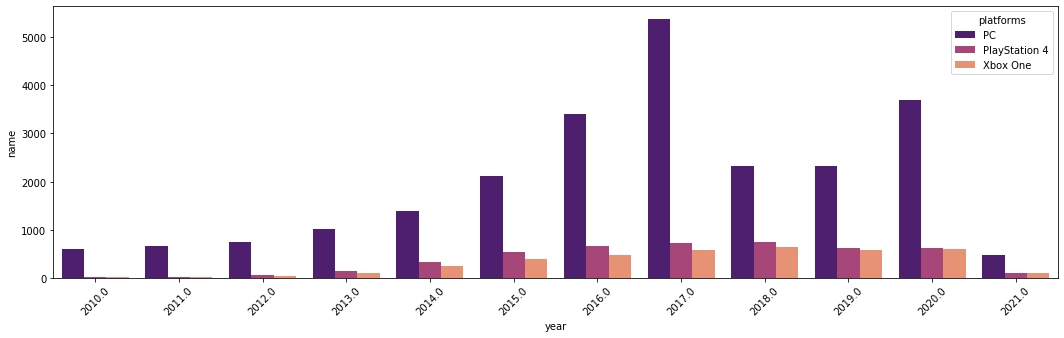

In [164]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='year', y = 'name',hue='platforms',palette = "magma", data=df2)
plt.setp(ax.get_xticklabels(), rotation=45)
None

# 2.Do game ratings vary from year to year for each of these platforms? And how?


In [165]:
df3= df1.copy()
df3= df3[['platforms','year', 'normalized_weighted_score']]
df3.head(20)

df4 = df3.groupby(by=['platforms','year']).mean().reset_index()
#df4.head()
df4.head(30)

,platforms,year,normalized_weighted_score
0,PC,2010.0,1.850204
1,PC,2011.0,1.908064
2,PC,2012.0,1.566582
3,PC,2013.0,1.295338
4,PC,2014.0,0.707872
5,PC,2015.0,0.671503
6,PC,2016.0,0.527621
7,PC,2017.0,0.440180
8,PC,2018.0,0.424718
9,PC,2019.0,0.336356


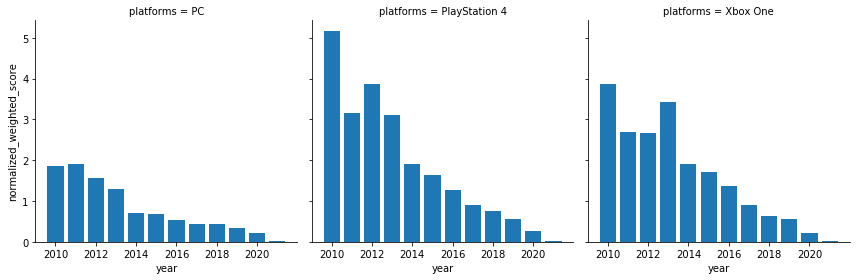

In [166]:
g = sns.FacetGrid(df4, col = "platforms" , height = 4, palette = 'rocket')
g.map(plt.bar, "year","normalized_weighted_score")
plt.show()

# 3.In each platform, which genre has the most releases and what is the top 5 of this genre?


In [167]:
df5 = df1.copy()
df5 = df5[['platforms','name', 'genres']]
df5.head()

,platforms,name,genres
0,PC,GrandTheftAutoV,"5,10,14,31"
0,PlayStation 4,GrandTheftAutoV,"5,10,14,31"
0,Xbox One,GrandTheftAutoV,"5,10,14,31"
1,PC,TheWitcher3:WildHunt,"12,31"
1,PlayStation 4,TheWitcher3:WildHunt,"12,31"


In [168]:
df5['genres']= df5['genres'].astype(str)
df5['genres']= df5['genres'].str.split(",")
df5 = df5.explode('genres')
df5['genres'] = pd.to_numeric(df5['genres'], errors='coerce',downcast = 'integer')

def genre_value(x):
    for key in genres.keys():
        if key==x:
            return genres[key]
df5["genres"]=list(map(genre_value,df5['genres']))
df5.head(30)

,platforms,name,genres
0,PC,GrandTheftAutoV,Shooter
0,PC,GrandTheftAutoV,Racing
0,PC,GrandTheftAutoV,Sport
0,PC,GrandTheftAutoV,Adventure
0,PlayStation 4,GrandTheftAutoV,Shooter
0,PlayStation 4,GrandTheftAutoV,Racing
0,PlayStation 4,GrandTheftAutoV,Sport
0,PlayStation 4,GrandTheftAutoV,Adventure
0,Xbox One,GrandTheftAutoV,Shooter
0,Xbox One,GrandTheftAutoV,Racing


In [218]:
df6.loc[("PlayStation 4")].idxmax()#.loc[('genres')]
df6.loc[("PC")].idxmax()

name    Indie
dtype: object

In [206]:
df6 = df5.groupby(by=['platforms','genres']).count().sort_values(by=['platforms','name'], ascending=False)#.reset_index()
#.agg('max')#.sort_values(by='name', ascending=False)#.reset_index()
#df7 = df6.groupby(by=['platforms','genres'])['name'].max()
df6.tail(40)

name
platforms     genres                           
PlayStation 4 Strategy                      473
              Puzzle                        446
              Arcade                        370
              Sport                         344
              Hack and slash/Beat 'em up    334
              Fighting                      269
              Racing                        214
              Tactical                      162
              Point-and-click               138
              Visual Novel                  102
              Turn-based strategy (TBS)     101
              Music                          84
              Real Time Strategy (RTS)       58
              Quiz/Trivia                    29
              Pinball                        15
              Card & Board Game              10
              MOBA                            2
PC            Indie                       14072
              Adventure                    9625
              Strategy                     4304
              Role-playing (RPG)           4265
              Simulator                    3867
              Shooter                      2293
              Puzzle                       2103
              Platform                     1646
              Sport                        1094
              Arcade                        950
              Racing                        819
              Visual Novel                  681
              Point-and-click               637
              Hack and slash/Beat 'em up    567
              Turn-based strategy (TBS)     512
              Real Time Strategy (RTS)      466
              Tactical                      457
              Fighting                      430
              Music                         187
              Card & Board Game              76
              Quiz/Trivia                    65
              Pinball                        41
              MOBA                           16

In [196]:
df6.groupby(by=['platforms']).agg({
    'name' : 'max',
    'genres': 'min'
})
#['name'].max()#.count().reset_index()

,name,genres
platforms,,
PC,14072,Adventure
PlayStation 4,2099,Adventure
Xbox One,1804,Adventure


In [ ]:
df6.groupby('platforms')[['genres','name']].agg('max')

In [ ]:
df5.groupby('platforms')[['genres','name']].count().agg('max')
#df6.head()

# 4.Bonus: Which perspective is the most common for games that are published to all three platforms?